In [19]:
# viewing the content of the fits data cube

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from astropy.io import ascii
from astropy.modeling import models, fitting
from astropy.modeling.models import Gaussian1D

# for the animation
import glob
from PIL import Image
import os
from IPython import display

In [2]:
# opening the data file

data_dir = '/Users/denes/App_installers/gausspyplus-master/gausspyplus/data/'
file = 'grs-test_field.fits'
hdul = fits.open(data_dir+file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data


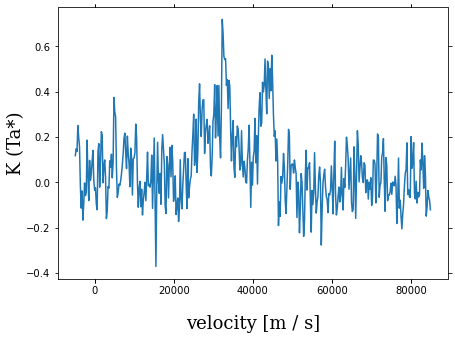

In [3]:

# make figure

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, projection=WCS(h), slices=(50, 50, 'x'))
plt.plot(d[:,40,40])  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
ax.set_xlabel('velocity [m / s]', size=18,family='serif')
ax.set_ylabel('K (Ta*)', size=18,family='serif')

plt.show()

In [6]:
# read the data file

data_dir = '/Users/denes/App_installers/gausspyplus-master/example/decomposition_grs/gpy_decomposed/'
data_file = 'grs-test_field_g+_fit_fin_sf-p2_finalized.dat'
data = ascii.read(os.path.join(data_dir + data_file))

In [7]:
data.keys()

['x_pos',
 'y_pos',
 'GLON',
 'GLAT',
 'amp',
 'e_amp',
 'VLSR',
 'e_VLSR',
 'vel_disp',
 'e_vel_disp',
 'int_tot',
 'e_int_tot',
 'rms',
 'pvalue',
 'aicc',
 'rchi2',
 'ncomps',
 'ncomp_wmedian',
 'ncomp_jumps',
 'flag_blended',
 'flag_neg_res_peak',
 'flag_broad',
 'flag_centroid']

In [34]:
x_pix = 50
y_pix = 40

data_2 = data[data['x_pos']==x_pix]
data_3 = data_2[data_2['y_pos']==y_pix]

data_3

x_pos,y_pos,GLON,GLAT,amp,e_amp,VLSR,e_VLSR,vel_disp,e_vel_disp,int_tot,e_int_tot,rms,pvalue,aicc,rchi2,ncomps,ncomp_wmedian,ncomp_jumps,flag_blended,flag_neg_res_peak,flag_broad,flag_centroid
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64
50,40,55.385,0.253,0.5148,0.0758,32.3394,0.0649,0.4144,0.0768,0.5347,0.1925,0.104,0.1462,-601.9232,0.7512,4,3,0,0,0,0,0
50,40,55.385,0.253,0.6223,0.1357,42.3097,0.0822,0.6557,0.1218,1.0229,0.4545,0.104,0.1462,-601.9232,0.7512,4,3,0,0,0,0,0
50,40,55.385,0.253,0.9389,0.0431,31.0987,0.0986,1.9537,0.0768,4.5977,0.4002,0.104,0.1462,-601.9232,0.7512,4,3,0,0,0,0,0
50,40,55.385,0.253,0.2039,0.0406,44.5244,0.9737,1.5397,0.7475,0.7868,0.6147,0.104,0.1462,-601.9232,0.7512,4,3,0,0,0,0,0


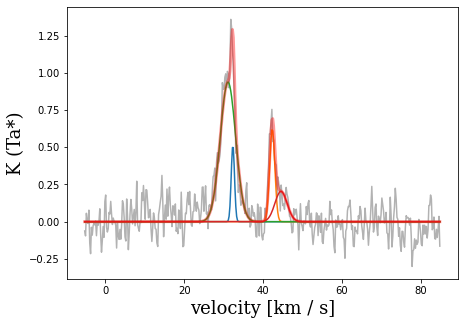

In [51]:
spectra = d[:,y_pix,x_pix]

# calculate the value for the first coordinate
s_start = h['CRVAL3'] - h['CRPIX3']*h['CDELT3']

# calculate the velocity axis
x_axis = (np.arange(0,len(spectra))*h['CDELT3']+s_start) / 1000 # we also convert to km/s from m/s


# make figure

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
plt.plot(x_axis, spectra, color='grey', alpha=0.6) 

for i in range(len(data_3)):
    model = models.Gaussian1D(amplitude=data_3['amp'][i], mean=data_3['VLSR'][i], stddev=data_3['vel_disp'][i])
    plt.plot(x_axis, model(x_axis)) 
    
    if i == 0:
        model_all = model
    else:
        model_all += model 
    
plt.plot(x_axis, model_all(x_axis), color = 'r', lw=3, alpha = 0.4)

ax.set_xlabel('velocity [km / s]', size=18,family='serif')
ax.set_ylabel('K (Ta*)', size=18,family='serif')

plt.show()
